This is another example that builds off from the [Tensorflow documentation](https://www.tensorflow.org/tutorials/non-ml/pdes) and solves numerically the diffusion/heat PDE (This code is an adaptation and I do not own it) $$\frac{\partial u}{\partial t} = \nabla ^2 u$$

In [1]:
#Import libraries for simulation
import tensorflow as tf
import numpy as np

#Imports for visualization
import PIL.Image
from io import BytesIO
from IPython.display import clear_output, Image, display

In [2]:
def DisplayArray(a, fmt='jpeg', rng=[0,1]):
  """Display an array as a picture."""
  a = (a - rng[0])/float(rng[1] - rng[0])*255
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  PIL.Image.fromarray(a).save(f, fmt)
  clear_output(wait = True)
  display(Image(data=f.getvalue()))

In [3]:
sess = tf.InteractiveSession()

In [4]:
def make_kernel(a):
  """Transform a 2D array into a convolution kernel"""
  a = np.asarray(a)
  a = a.reshape(list(a.shape) + [1,1])
  return tf.constant(a, dtype=1)

def simple_conv(x, k):
  """A simplified 2D convolution operation"""
  x = tf.expand_dims(tf.expand_dims(x, 0), -1)
  y = tf.nn.depthwise_conv2d(x, k, [1, 1, 1, 1], padding='SAME')
  return y[0, :, :, 0]

def laplace(x):
  """Compute the 2D laplacian of an array"""
  laplace_k = make_kernel([[0.5, 1.0, 0.5],
                           [1.0, -6., 1.0],
                           [0.5, 1.0, 0.5]])
  return simple_conv(x, laplace_k)

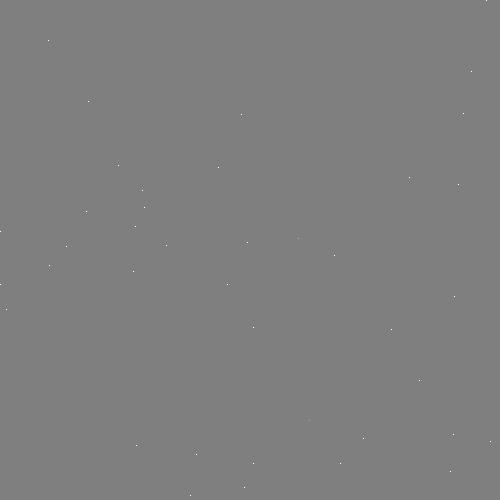

In [5]:
N=500
# Initial Conditions -- some high temperature spots on material

# Set everything to zero
u_init = np.zeros([N, N], dtype=np.float32)

# Some high temp spots hit at random
for n in range(40):
  a,b = np.random.randint(0, N, 2)
  u_init[a,b] = np.random.uniform()

DisplayArray(u_init, rng=[-0.1, 0.1])

In [6]:
# Parameters:
# eps -- time resolution
# D -- diffusion/conductivity coefficient
dt = tf.placeholder(tf.float32, shape=())
damping = tf.placeholder(tf.float32, shape=())
D = 2

# Create variables for simulation state
U  = tf.Variable(u_init)

# Discretized PDE update rules
U_ = U + dt * (D*laplace(U)) 

# Operation to update the state
step = tf.group(
  U.assign(U_))

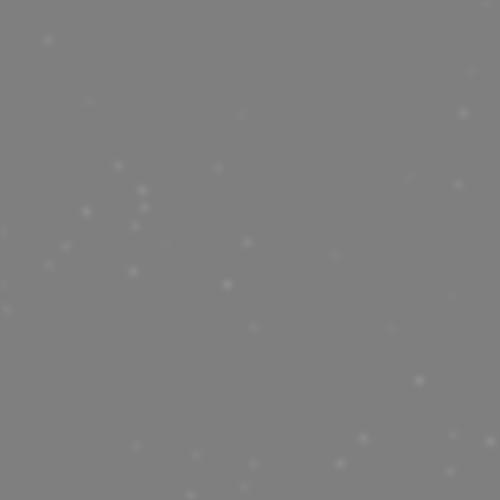

In [7]:
# Initialize state to initial conditions
tf.global_variables_initializer().run()

# Run 25 steps of PDE
for i in range(25):
  # Step simulation
  step.run({dt: 0.01})
  step.run({dt: 0.01})
  step.run({dt: 0.01})
  step.run({dt: 0.01})
  step.run({dt: 0.01})
  step.run({dt: 0.01})
  step.run({dt: 0.01})
  DisplayArray(U.eval(), rng=[-0.1, 0.1])